## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [1]:
import math, random

#function to generate random numbers according to linear law
def random_frequency(n, p):
    m = 0

    for _ in range(n+1):
        u = random.uniform(0,1)
        
        if u < p:
            m+=1
        random_frequency = m / n

    return random_frequency


'''
The probability p=0,5 causes the generated random frequencies to cluster around it. 
As N increases, the random frequencies generated begin to cluster around the mean. Thus as N increases, 
the random frequencies become tightly closed to the mean.


'''

'\nThe probability p=0,5 causes the generated random frequencies to cluster around it. \nAs N increases, the random frequencies generated begin to cluster around the mean. Thus as N increases, \nthe random frequencies become tightly closed to the mean.\n\n\n'

In [2]:

# Function to calculate mean for normal distribution
def mean_theory(rf1):
    math_exp = 0.5*(rf1)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(rf1):
    variance_value = (1/12)*(rf1**2)
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [3]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [4]:
def simulations(rf1, random_frequencies):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(rf1)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_frequencies)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_frequencies)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(rf1)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_frequencies, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [5]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with {n} random numbers each:")

    print(f"Random frequencies: {random_frequencies}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random_freq is {max(random_frequencies)}")
    print(f"Min_Random_freq is {min(random_frequencies)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [6]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(8, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Histogram")
            #tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) for x in x_values]
    
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    y_value = [normal_dis_function(std_dev_theory, mean_theory, x) for x in x_values]
  
    plt.plot(x_value, y_value, color='red', label="Normal PDF")
    
    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [7]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.08, 0.1, 0.06, 0.08, 0.14, 0.18, 0.14, 0.08, 0.12, 0.1]
Max_Random_freq is 0.18
Min_Random_freq is 0.06

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10800000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0013511111111111074

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.036757463338907205

Relative Error for Mathematical Expectation: 78.4%
Relative Error for Standard Deviation: 87.26684118793247%
Relative Error for Variance: 98.37866666666667%



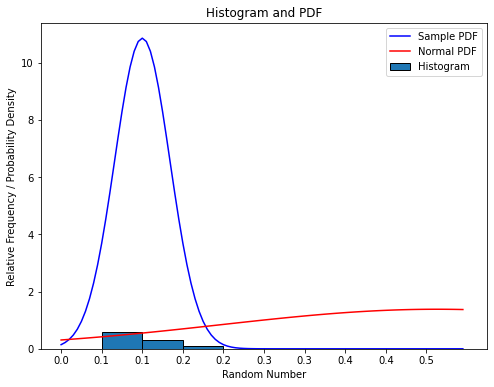

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.05, 0.06, 0.11, 0.14, 0.06, 0.08, 0.09, 0.1, 0.1, 0.13]
Max_Random_freq is 0.14
Min_Random_freq is 0.05

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.092

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0009066666666666694

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.030110906108363287

Relative Error for Mathematical Expectation: 81.60000000000001%
Relative Error for Standard Deviation: 89.56927615167574%
Relative Error for Variance: 98.912%



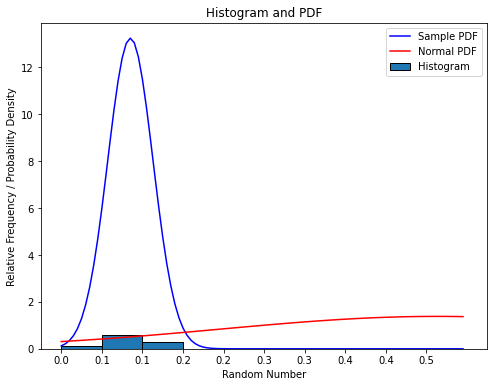

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 10 random numbers each:
Random frequencies: [0.13, 0.105, 0.1, 0.105, 0.115, 0.135, 0.1, 0.125, 0.085, 0.085]
Max_Random_freq is 0.135
Min_Random_freq is 0.085

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.1085

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.00030583333333333276

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.01748809118609955

Relative Error for Mathematical Expectation: 78.3%
Relative Error for Standard Deviation: 93.94194750765563%
Relative Error for Variance: 99.633%



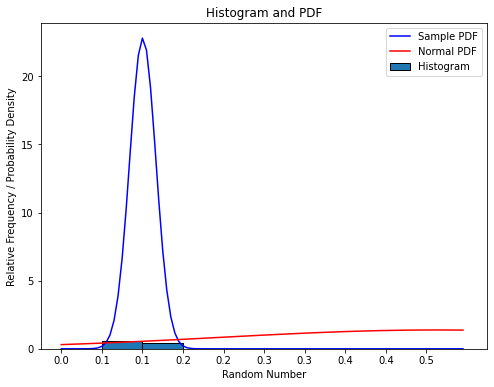

[78.3]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.1, 0.12, 0.18, 0.04, 0.1, 0.1, 0.04, 0.12, 0.1, 0.1, 0.04, 0.12, 0.18, 0.12, 0.12, 0.06, 0.04, 0.1, 0.02, 0.1]
Max_Random_freq is 0.18
Min_Random_freq is 0.02

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.09500000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0019315789473684172

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.04394973205115609

Relative Error for Mathematical Expectation: 81.0%
Relative Error for Standard Deviation: 84.77536622167186%
Relative Error for Variance: 97.6821052631579%



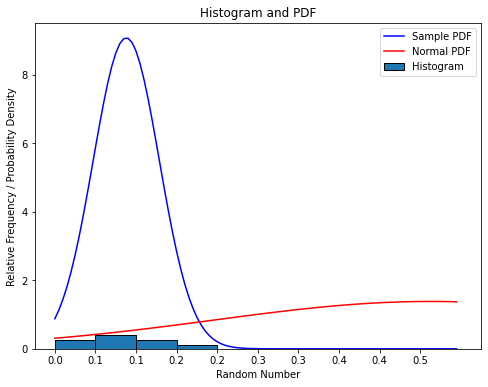

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.15, 0.11, 0.12, 0.1, 0.12, 0.06, 0.09, 0.07, 0.11, 0.09, 0.16, 0.11, 0.13, 0.11, 0.1, 0.05, 0.15, 0.08, 0.12, 0.09]
Max_Random_freq is 0.16
Min_Random_freq is 0.05

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10600000000000001

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0008463157894736796

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.02909150717088545

Relative Error for Mathematical Expectation: 78.8%
Relative Error for Standard Deviation: 89.92240630225442%
Relative Error for Variance: 98.98442105263157%



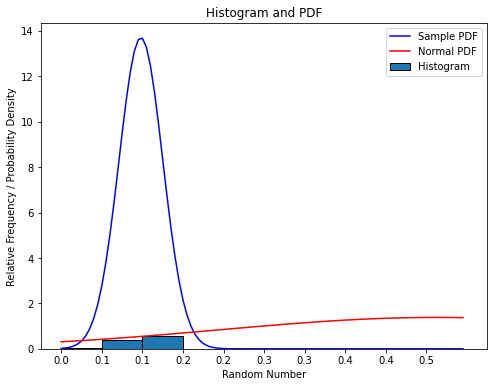

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 20 random numbers each:
Random frequencies: [0.105, 0.11, 0.095, 0.11, 0.115, 0.07, 0.1, 0.095, 0.075, 0.15, 0.09, 0.075, 0.07, 0.125, 0.11, 0.07, 0.135, 0.125, 0.085, 0.095]
Max_Random_freq is 0.15
Min_Random_freq is 0.07

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10025000000000002

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0005196710526315764

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.022796294712772433

Relative Error for Mathematical Expectation: 79.95%
Relative Error for Standard Deviation: 92.10313186663286%
Relative Error for Variance: 99.3763947368421%



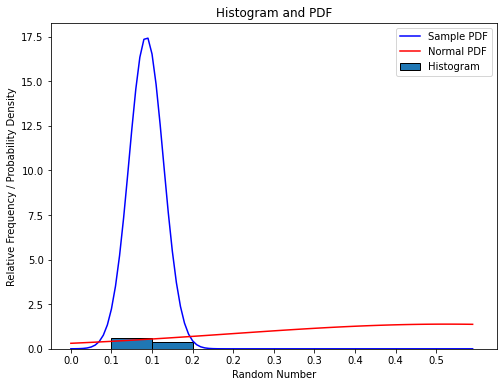

[78.3, 79.95]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.12, 0.06, 0.04, 0.1, 0.06, 0.12, 0.08, 0.12, 0.12, 0.08, 0.12, 0.14, 0.16, 0.1, 0.1, 0.08, 0.16, 0.04, 0.16, 0.08, 0.08, 0.1, 0.1, 0.08, 0.1, 0.1, 0.18, 0.08, 0.1, 0.04, 0.1, 0.12, 0.08, 0.06, 0.22, 0.12, 0.08, 0.14, 0.14, 0.1, 0.1, 0.14, 0.14, 0.1, 0.08, 0.06, 0.1, 0.12, 0.0, 0.12]
Max_Random_freq is 0.22
Min_Random_freq is 0.0

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10239999999999999

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0015124897959183702

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.03889074177639673

Relative Error for Mathematical Expectation: 79.52%
Relative Error for Standard Deviation: 86.5278518

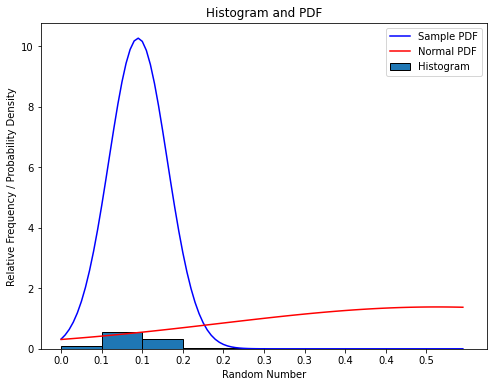

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.12, 0.11, 0.12, 0.09, 0.11, 0.07, 0.14, 0.12, 0.07, 0.09, 0.11, 0.11, 0.1, 0.1, 0.17, 0.08, 0.15, 0.1, 0.12, 0.1, 0.1, 0.13, 0.07, 0.07, 0.1, 0.05, 0.05, 0.1, 0.08, 0.13, 0.08, 0.13, 0.15, 0.1, 0.17, 0.07, 0.16, 0.11, 0.1, 0.08, 0.11, 0.09, 0.09, 0.08, 0.13, 0.09, 0.1, 0.09, 0.17, 0.1]
Max_Random_freq is 0.17
Min_Random_freq is 0.05

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.10519999999999997

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0008458775510204207

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.02908397412700714

Relative Error for Mathematical Expectation: 78.96000000000001%
Relative Error for Standard Deviation: 89.9250

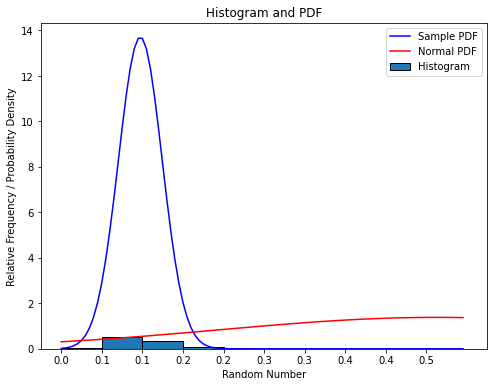

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 50 random numbers each:
Random frequencies: [0.08, 0.085, 0.13, 0.1, 0.12, 0.145, 0.115, 0.155, 0.075, 0.06, 0.04, 0.1, 0.09, 0.1, 0.09, 0.105, 0.1, 0.105, 0.08, 0.135, 0.085, 0.145, 0.08, 0.065, 0.125, 0.12, 0.125, 0.1, 0.105, 0.11, 0.105, 0.11, 0.055, 0.085, 0.085, 0.105, 0.125, 0.14, 0.13, 0.095, 0.1, 0.085, 0.115, 0.085, 0.08, 0.085, 0.12, 0.095, 0.095, 0.095]
Max_Random_freq is 0.155
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.1012

Theoretical Variance: 0.08333333333333333
Unbiased Sample Variance: 0.0005719999999999999

Theoretical Standard Deviation: 0.28867513459481287
Sample Standard Deviation: 0.023916521486202793

Relative Error for Mathematical Expectation: 79.75999999999999%
Relative Error for Stand

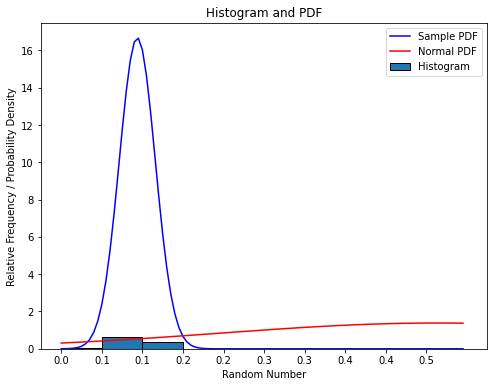

[78.3, 79.95, 79.75999999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.06, 0.06, 0.06, 0.08, 0.1, 0.04, 0.14, 0.08, 0.04, 0.12, 0.06, 0.18, 0.08, 0.08, 0.06, 0.1, 0.14, 0.18, 0.14, 0.06, 0.08, 0.04, 0.16, 0.04, 0.12, 0.1, 0.1, 0.08, 0.1, 0.1, 0.14, 0.16, 0.12, 0.08, 0.04, 0.18, 0.12, 0.18, 0.12, 0.12, 0.1, 0.1, 0.14, 0.16, 0.04, 0.22, 0.1, 0.12, 0.08, 0.16, 0.1, 0.08, 0.1, 0.22, 0.06, 0.12, 0.02, 0.1, 0.06, 0.12, 0.06, 0.1, 0.02, 0.14, 0.08, 0.04, 0.24, 0.06, 0.12, 0.16, 0.12, 0.16, 0.04, 0.06, 0.06, 0.06, 0.06, 0.08, 0.24, 0.12, 0.14, 0.08, 0.08, 0.1, 0.12, 0.12, 0.02, 0.04, 0.12, 0.1, 0.1, 0.0, 0.02, 0.08, 0.12, 0.12, 0.06, 0.12, 0.06, 0.06]
Max_Random_freq is 0.24
Min_Random_freq is 0.0

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sampl

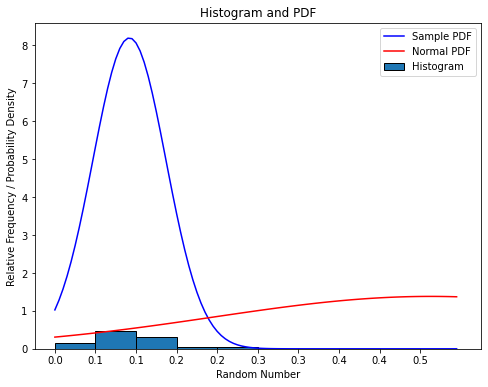

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.13, 0.1, 0.1, 0.11, 0.07, 0.05, 0.12, 0.1, 0.06, 0.11, 0.1, 0.13, 0.14, 0.12, 0.12, 0.14, 0.09, 0.09, 0.13, 0.09, 0.06, 0.16, 0.13, 0.15, 0.09, 0.11, 0.07, 0.1, 0.11, 0.05, 0.1, 0.11, 0.06, 0.1, 0.06, 0.07, 0.12, 0.12, 0.08, 0.1, 0.1, 0.11, 0.1, 0.12, 0.14, 0.07, 0.04, 0.13, 0.06, 0.1, 0.08, 0.11, 0.05, 0.13, 0.09, 0.14, 0.09, 0.08, 0.09, 0.16, 0.1, 0.07, 0.11, 0.09, 0.05, 0.07, 0.16, 0.08, 0.14, 0.11, 0.08, 0.07, 0.11, 0.11, 0.09, 0.06, 0.06, 0.11, 0.15, 0.13, 0.11, 0.07, 0.07, 0.13, 0.12, 0.1, 0.08, 0.1, 0.08, 0.09, 0.06, 0.06, 0.06, 0.08, 0.12, 0.12, 0.07, 0.12, 0.08, 0.13]
Max_Random_freq is 0.16
Min_Random_freq is 0.04

Mathematical Expectation (Theoretical): 0.5
Mathematical Expectation (Sample): 0.0984

Theoretical Vari

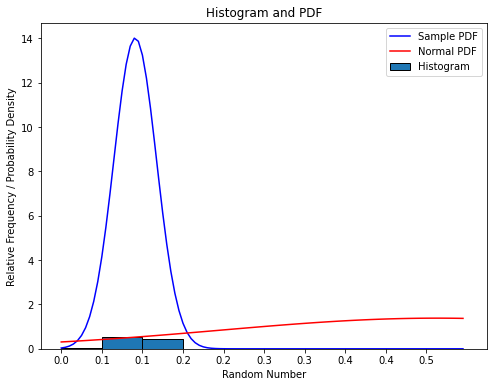

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 100 random numbers each:
Random frequencies: [0.145, 0.135, 0.115, 0.065, 0.07, 0.1, 0.1, 0.12, 0.11, 0.115, 0.1, 0.09, 0.105, 0.115, 0.09, 0.07, 0.12, 0.1, 0.16, 0.105, 0.11, 0.12, 0.08, 0.12, 0.085, 0.11, 0.115, 0.105, 0.105, 0.11, 0.105, 0.095, 0.125, 0.115, 0.1, 0.09, 0.13, 0.13, 0.1, 0.1, 0.115, 0.125, 0.105, 0.1, 0.09, 0.08, 0.08, 0.135, 0.11, 0.045, 0.1, 0.075, 0.095, 0.12, 0.065, 0.12, 0.1, 0.1, 0.085, 0.07, 0.09, 0.07, 0.13, 0.07, 0.11, 0.105, 0.09, 0.1, 0.12, 0.095, 0.105, 0.105, 0.115, 0.095, 0.115, 0.085, 0.1, 0.135, 0.11, 0.085, 0.17, 0.125, 0.125, 0.075, 0.075, 0.115, 0.13, 0.095, 0.095, 0.12, 0.08, 0.05, 0.115, 0.12, 0.1, 0.09, 0.11, 0.105, 0.115, 0.085]
Max_Random_freq is 0.17
Min_Random_freq is 0.045

Mathematical Expectation (Theoretical): 0.5
Mathematical

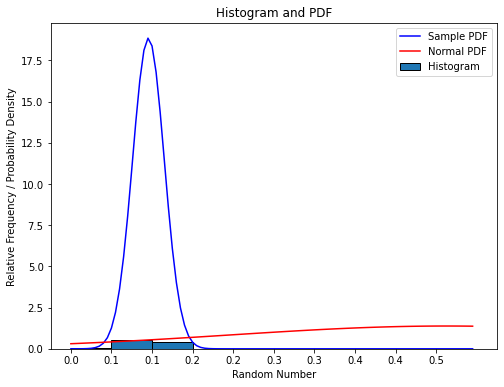

[78.3, 79.95, 79.75999999999999, 79.36]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.12, 0.06, 0.08, 0.12, 0.06, 0.1, 0.06, 0.22, 0.2, 0.04, 0.12, 0.08, 0.14, 0.06, 0.08, 0.16, 0.08, 0.1, 0.06, 0.08, 0.1, 0.0, 0.06, 0.14, 0.16, 0.16, 0.1, 0.08, 0.06, 0.08, 0.04, 0.18, 0.08, 0.1, 0.08, 0.1, 0.06, 0.16, 0.12, 0.12, 0.06, 0.04, 0.1, 0.04, 0.1, 0.1, 0.1, 0.12, 0.04, 0.14, 0.12, 0.12, 0.1, 0.24, 0.14, 0.08, 0.08, 0.12, 0.18, 0.02, 0.1, 0.14, 0.04, 0.14, 0.08, 0.08, 0.1, 0.06, 0.2, 0.1, 0.1, 0.04, 0.16, 0.08, 0.14, 0.06, 0.06, 0.14, 0.08, 0.16, 0.08, 0.08, 0.16, 0.18, 0.1, 0.14, 0.12, 0.22, 0.06, 0.08, 0.02, 0.08, 0.06, 0.06, 0.1, 0.04, 0.04, 0.04, 0.18, 0.06, 0.12, 0.08, 0.08, 0.06, 0.12, 0.14, 0.12, 0.1, 0.18, 0.1, 0.06, 0.12, 0.06, 0.16, 0.14, 0.06, 0.04, 0.1, 0.1, 0.04, 0.1

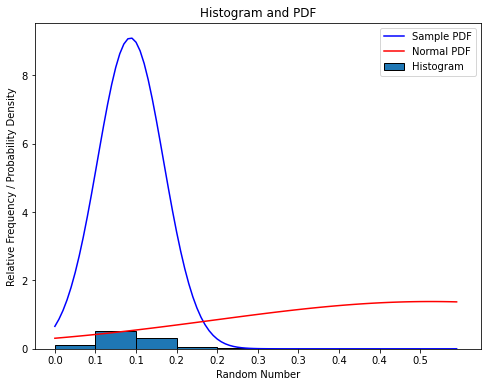

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.08, 0.13, 0.13, 0.09, 0.07, 0.1, 0.1, 0.11, 0.07, 0.11, 0.15, 0.13, 0.1, 0.06, 0.15, 0.13, 0.1, 0.06, 0.1, 0.11, 0.11, 0.1, 0.09, 0.11, 0.11, 0.09, 0.1, 0.13, 0.11, 0.11, 0.09, 0.12, 0.11, 0.13, 0.08, 0.12, 0.1, 0.11, 0.13, 0.08, 0.04, 0.07, 0.11, 0.09, 0.09, 0.08, 0.09, 0.13, 0.08, 0.08, 0.08, 0.09, 0.06, 0.11, 0.08, 0.06, 0.14, 0.17, 0.12, 0.08, 0.12, 0.08, 0.1, 0.08, 0.12, 0.12, 0.07, 0.07, 0.11, 0.12, 0.09, 0.11, 0.1, 0.07, 0.08, 0.07, 0.08, 0.12, 0.11, 0.1, 0.1, 0.15, 0.11, 0.12, 0.14, 0.12, 0.03, 0.17, 0.12, 0.08, 0.1, 0.15, 0.15, 0.12, 0.08, 0.13, 0.11, 0.09, 0.12, 0.07, 0.19, 0.14, 0.14, 0.15, 0.2, 0.09, 0.1, 0.08, 0.04, 0.12, 0.16, 0.11, 0.07, 0.12, 0.11, 0.11, 0.1, 0.13, 0.05, 0.05, 0.1, 0.08, 0.07, 0.13, 0.07, 0.07,

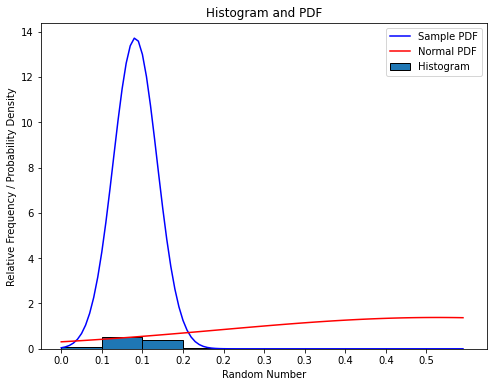

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 200 random numbers each:
Random frequencies: [0.09, 0.09, 0.11, 0.145, 0.11, 0.065, 0.105, 0.085, 0.105, 0.115, 0.105, 0.1, 0.13, 0.085, 0.115, 0.145, 0.1, 0.11, 0.065, 0.1, 0.1, 0.105, 0.125, 0.085, 0.11, 0.09, 0.085, 0.1, 0.11, 0.1, 0.12, 0.125, 0.105, 0.115, 0.1, 0.095, 0.13, 0.08, 0.055, 0.145, 0.11, 0.1, 0.075, 0.11, 0.08, 0.115, 0.085, 0.055, 0.14, 0.07, 0.1, 0.085, 0.085, 0.105, 0.07, 0.09, 0.09, 0.115, 0.12, 0.07, 0.125, 0.11, 0.115, 0.1, 0.1, 0.105, 0.09, 0.105, 0.09, 0.12, 0.105, 0.09, 0.08, 0.115, 0.07, 0.13, 0.08, 0.115, 0.07, 0.085, 0.095, 0.11, 0.095, 0.135, 0.12, 0.125, 0.11, 0.075, 0.065, 0.08, 0.095, 0.12, 0.105, 0.08, 0.11, 0.075, 0.095, 0.12, 0.09, 0.135, 0.155, 0.13, 0.09, 0.1, 0.13, 0.105, 0.085, 0.12, 0.115, 0.115, 0.11, 0.13, 0.095, 0.09, 0.075, 0.105

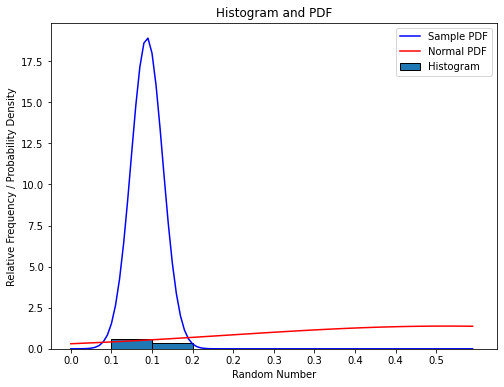

[78.3, 79.95, 79.75999999999999, 79.36, 79.75999999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.14, 0.14, 0.06, 0.2, 0.14, 0.08, 0.12, 0.14, 0.1, 0.1, 0.06, 0.16, 0.1, 0.14, 0.12, 0.12, 0.08, 0.06, 0.16, 0.06, 0.18, 0.14, 0.1, 0.12, 0.12, 0.08, 0.08, 0.1, 0.0, 0.08, 0.1, 0.12, 0.08, 0.12, 0.06, 0.14, 0.06, 0.1, 0.04, 0.1, 0.12, 0.1, 0.08, 0.14, 0.06, 0.06, 0.1, 0.08, 0.12, 0.1, 0.16, 0.12, 0.08, 0.1, 0.04, 0.06, 0.12, 0.1, 0.14, 0.08, 0.12, 0.1, 0.04, 0.1, 0.04, 0.12, 0.14, 0.12, 0.08, 0.08, 0.14, 0.08, 0.12, 0.04, 0.08, 0.12, 0.1, 0.12, 0.14, 0.08, 0.08, 0.06, 0.06, 0.14, 0.1, 0.1, 0.18, 0.08, 0.16, 0.18, 0.2, 0.04, 0.12, 0.08, 0.14, 0.06, 0.08, 0.1, 0.06, 0.16, 0.08, 0.18, 0.08, 0.12, 0.12, 0.06, 0.08, 0.1, 0.12, 0.04, 0.18, 0.1, 0.14, 0.08, 0.12, 0.12, 0.12, 0.

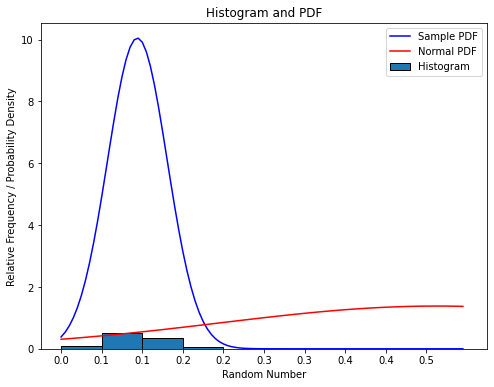

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.07, 0.13, 0.14, 0.13, 0.14, 0.09, 0.06, 0.1, 0.1, 0.1, 0.04, 0.05, 0.09, 0.09, 0.13, 0.07, 0.07, 0.08, 0.08, 0.07, 0.11, 0.09, 0.1, 0.12, 0.08, 0.11, 0.06, 0.07, 0.08, 0.06, 0.05, 0.16, 0.08, 0.07, 0.13, 0.12, 0.12, 0.12, 0.08, 0.16, 0.05, 0.12, 0.15, 0.14, 0.09, 0.06, 0.16, 0.13, 0.11, 0.12, 0.1, 0.08, 0.08, 0.07, 0.14, 0.05, 0.09, 0.12, 0.12, 0.1, 0.12, 0.12, 0.11, 0.11, 0.13, 0.08, 0.07, 0.12, 0.1, 0.15, 0.12, 0.15, 0.16, 0.12, 0.12, 0.05, 0.12, 0.07, 0.06, 0.09, 0.13, 0.16, 0.09, 0.05, 0.05, 0.09, 0.1, 0.07, 0.08, 0.13, 0.14, 0.12, 0.18, 0.06, 0.13, 0.05, 0.1, 0.07, 0.12, 0.06, 0.02, 0.15, 0.09, 0.16, 0.09, 0.1, 0.07, 0.03, 0.1, 0.04, 0.11, 0.07, 0.09, 0.09, 0.08, 0.14, 0.12, 0.06, 0.16, 0.16, 0.07, 0.1, 0.15, 0.06, 0.07, 

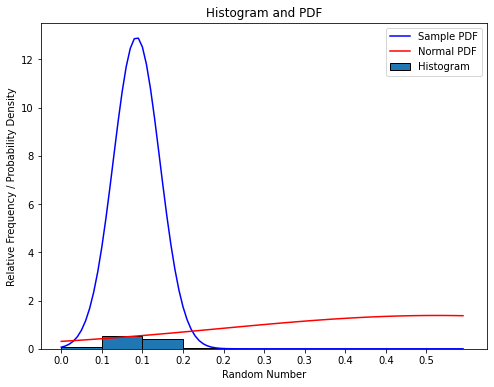

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 500 random numbers each:
Random frequencies: [0.105, 0.09, 0.125, 0.07, 0.095, 0.06, 0.105, 0.1, 0.115, 0.085, 0.075, 0.075, 0.095, 0.085, 0.08, 0.085, 0.07, 0.115, 0.07, 0.085, 0.09, 0.09, 0.12, 0.12, 0.08, 0.06, 0.06, 0.08, 0.115, 0.085, 0.095, 0.085, 0.115, 0.125, 0.12, 0.11, 0.125, 0.085, 0.075, 0.09, 0.115, 0.11, 0.11, 0.115, 0.09, 0.115, 0.16, 0.085, 0.075, 0.11, 0.095, 0.08, 0.13, 0.095, 0.085, 0.11, 0.095, 0.125, 0.1, 0.13, 0.1, 0.12, 0.085, 0.105, 0.11, 0.105, 0.105, 0.11, 0.1, 0.08, 0.125, 0.1, 0.07, 0.085, 0.075, 0.09, 0.1, 0.085, 0.115, 0.085, 0.08, 0.11, 0.115, 0.13, 0.105, 0.09, 0.105, 0.125, 0.09, 0.125, 0.105, 0.135, 0.1, 0.08, 0.09, 0.065, 0.12, 0.1, 0.115, 0.14, 0.105, 0.07, 0.07, 0.085, 0.09, 0.08, 0.095, 0.1, 0.105, 0.1, 0.13, 0.075, 0.09, 0.09, 0.115, 0

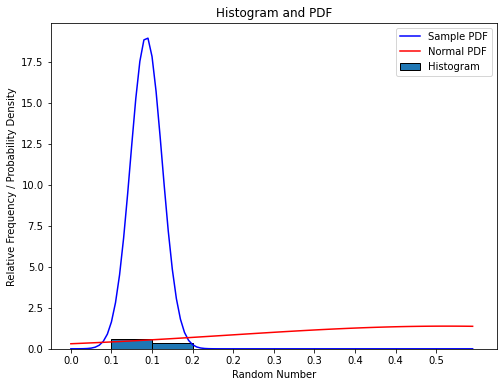

[78.3, 79.95, 79.75999999999999, 79.36, 79.75999999999999, 79.92999999999999]
STAGE n = 50
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.14, 0.08, 0.1, 0.12, 0.14, 0.1, 0.1, 0.08, 0.14, 0.1, 0.1, 0.08, 0.04, 0.06, 0.12, 0.06, 0.16, 0.04, 0.06, 0.06, 0.02, 0.06, 0.12, 0.14, 0.1, 0.1, 0.12, 0.12, 0.14, 0.08, 0.1, 0.14, 0.24, 0.12, 0.14, 0.04, 0.2, 0.14, 0.02, 0.06, 0.1, 0.06, 0.04, 0.06, 0.14, 0.18, 0.06, 0.06, 0.02, 0.12, 0.08, 0.14, 0.12, 0.12, 0.1, 0.12, 0.12, 0.12, 0.08, 0.04, 0.04, 0.16, 0.06, 0.14, 0.06, 0.12, 0.1, 0.08, 0.12, 0.12, 0.18, 0.16, 0.14, 0.06, 0.08, 0.1, 0.12, 0.08, 0.1, 0.1, 0.14, 0.18, 0.14, 0.0, 0.1, 0.12, 0.14, 0.04, 0.18, 0.14, 0.04, 0.08, 0.06, 0.12, 0.06, 0.08, 0.16, 0.1, 0.08, 0.1, 0.04, 0.06, 0.14, 0.04, 0.06, 0.16, 0.16, 0.04, 0.1, 0.12, 0.12, 0.04, 0.1, 0.1

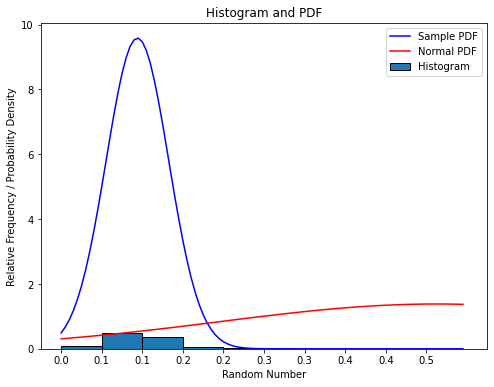

STAGE n = 100
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.08, 0.12, 0.13, 0.12, 0.14, 0.11, 0.15, 0.1, 0.12, 0.1, 0.15, 0.15, 0.06, 0.1, 0.03, 0.1, 0.09, 0.06, 0.15, 0.1, 0.18, 0.06, 0.06, 0.06, 0.11, 0.12, 0.1, 0.12, 0.08, 0.05, 0.08, 0.04, 0.08, 0.08, 0.04, 0.08, 0.12, 0.05, 0.09, 0.13, 0.09, 0.09, 0.1, 0.11, 0.1, 0.1, 0.1, 0.06, 0.12, 0.09, 0.07, 0.14, 0.09, 0.18, 0.1, 0.03, 0.08, 0.11, 0.1, 0.11, 0.13, 0.08, 0.12, 0.06, 0.15, 0.09, 0.09, 0.09, 0.07, 0.08, 0.07, 0.1, 0.06, 0.11, 0.09, 0.1, 0.14, 0.13, 0.13, 0.11, 0.11, 0.09, 0.11, 0.09, 0.14, 0.11, 0.05, 0.12, 0.05, 0.1, 0.15, 0.08, 0.1, 0.1, 0.13, 0.1, 0.1, 0.13, 0.12, 0.11, 0.1, 0.11, 0.08, 0.06, 0.16, 0.07, 0.1, 0.06, 0.04, 0.11, 0.07, 0.15, 0.13, 0.09, 0.09, 0.12, 0.14, 0.11, 0.07, 0.11, 0.1, 0.1, 0.12, 0.06, 0.07, 0.08, 0.08

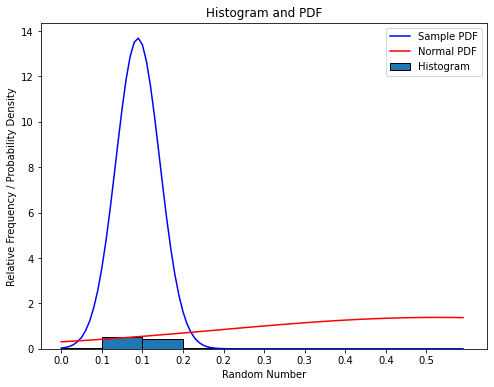

STAGE n = 200
________________________________________________________________________________________________________________________________________________________________________________

After a simulation with 1000 random numbers each:
Random frequencies: [0.11, 0.115, 0.095, 0.1, 0.115, 0.115, 0.1, 0.085, 0.11, 0.06, 0.075, 0.115, 0.1, 0.09, 0.06, 0.12, 0.11, 0.13, 0.105, 0.115, 0.15, 0.1, 0.085, 0.14, 0.1, 0.095, 0.135, 0.11, 0.095, 0.08, 0.115, 0.15, 0.115, 0.095, 0.09, 0.105, 0.075, 0.1, 0.095, 0.105, 0.11, 0.115, 0.12, 0.11, 0.135, 0.09, 0.09, 0.14, 0.105, 0.1, 0.1, 0.09, 0.145, 0.065, 0.095, 0.1, 0.105, 0.1, 0.13, 0.085, 0.11, 0.115, 0.105, 0.115, 0.12, 0.115, 0.095, 0.165, 0.1, 0.105, 0.135, 0.06, 0.13, 0.095, 0.07, 0.1, 0.115, 0.09, 0.135, 0.105, 0.075, 0.085, 0.095, 0.095, 0.12, 0.14, 0.095, 0.12, 0.12, 0.1, 0.11, 0.11, 0.115, 0.065, 0.075, 0.085, 0.08, 0.08, 0.095, 0.09, 0.12, 0.075, 0.165, 0.105, 0.09, 0.14, 0.1, 0.08, 0.1, 0.09, 0.135, 0.09, 0.085, 0.06, 0.055, 0.115,

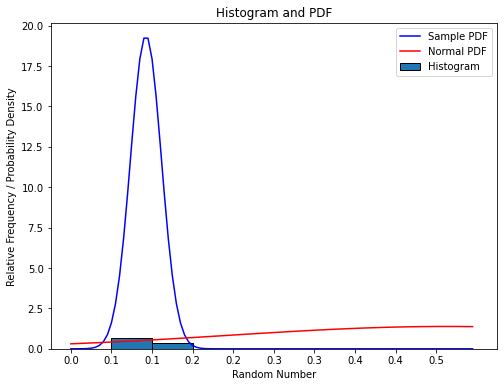

[78.3, 79.95, 79.75999999999999, 79.36, 79.75999999999999, 79.92999999999999, 80.02000000000007]


In [9]:

p = 0.5
rf1 = 1

stages = [50, 100, 200]
n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    for stage in stages:
        random_frequencies = []

        for _ in range(n):
            # Generate random numbers 
            random_freq = random_frequency(stage,p)
            random_frequencies.append(random_freq)

            mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, random_frequencies)
        
        print(f"STAGE n = {stage}")
        aggregate()

        left_boundary = 0  # Minimum boundary of the range
        right_boundary = 1 # Maximum boundary of the range
        num_plots = 10  # Number of intervals (bins)

        frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)

        draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
        

    relative_err_mean_list.append(relative_err)
    print(relative_err_mean_list)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)


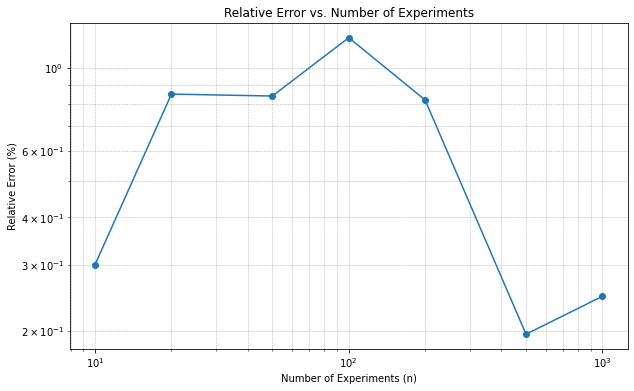

In [17]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

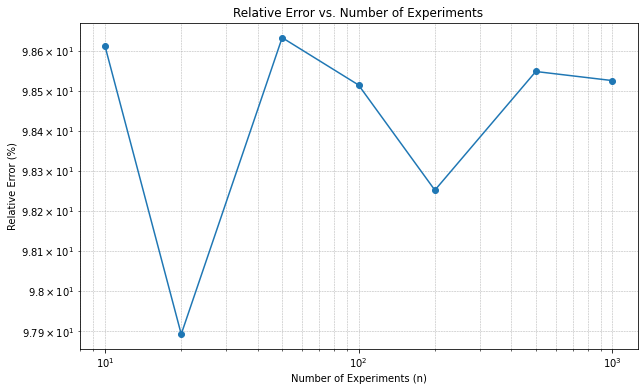

In [18]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

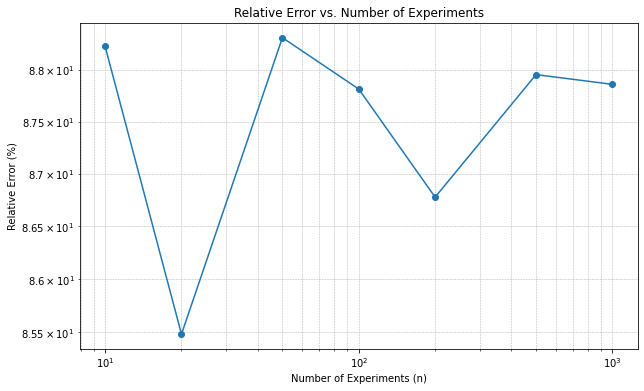

In [19]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [20]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 100 for i in range(100)]
y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

Estimated area under the PDF curve: 0.99700
